In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator

In [59]:
timestamps = ['20191127', '20150316']
models = ['swmf', 'lfm']
t = timestamps[1]
m = models[1]

In [60]:
file1 = pd.read_csv('{}_{}_omni.txt'.format(t, m), delim_whitespace=True, comment='#', index_col=False, header=None, dtype={0:int, 1:int, 2:int, 3:int, 4:int, 5:int}, names=['Year', 'Month', 'Day', 'Hour', 'Min', 'Sec', 'JH_N', 'I_N', 'DP_N', 'JH_S', 'I_S', 'DP_S', 'W_N', 'W_S'])
file2 = pd.read_csv('{}_{}_artemis.txt'.format(t, m), delim_whitespace=True, comment='#', index_col=False, header=None, dtype={0:int, 1:int, 2:int, 3:int, 4:int, 5:int}, names=['Year', 'Month', 'Day', 'Hour', 'Min', 'Sec', 'JH_N', 'I_N', 'DP_N', 'JH_S', 'I_S', 'DP_S', 'W_N', 'W_S'])

/var/folders/r8/nn5k90kx62v517flg32_mpw40000gn/T/ipykernel_76204/3264297472.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  file1 = pd.read_csv('{}_{}_omni.txt'.format(t, m), delim_whitespace=True, comment='#', index_col=False, header=None, dtype={0:int, 1:int, 2:int, 3:int, 4:int, 5:int}, names=['Year', 'Month', 'Day', 'Hour', 'Min', 'Sec', 'JH_N', 'I_N', 'DP_N', 'JH_S', 'I_S', 'DP_S', 'W_N', 'W_S'])
/var/folders/r8/nn5k90kx62v517flg32_mpw40000gn/T/ipykernel_76204/3264297472.py:2: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  file2 = pd.read_csv('{}_{}_artemis.txt'.format(t, m), delim_whitespace=True, comment='#', index_col=False, header=None, dtype={0:int, 1:int, 2:int, 3:int, 4:int, 5:int}, names=['Year', 'Month', 'Day', 'Hour', 'Min', 'Sec', 'JH_N', 'I_N', 'DP_N', 'JH_S', 'I_S', 'DP_S', 'W_N', 'W_S'])


In [61]:
file1['Time'] = pd.to_datetime(file1['Year'].astype(str)+file1['Month'].astype(str)+file1['Day'].astype(str)+file1['Hour'].astype(str)+file1['Min'].astype(str)+file1['Sec'].astype(str), format='%Y%m%d%H%M%S')
file2['Time'] = pd.to_datetime(file2['Year'].astype(str)+file2['Month'].astype(str)+file2['Day'].astype(str)+file2['Hour'].astype(str)+file2['Min'].astype(str)+file2['Sec'].astype(str), format='%Y%m%d%H%M%S')

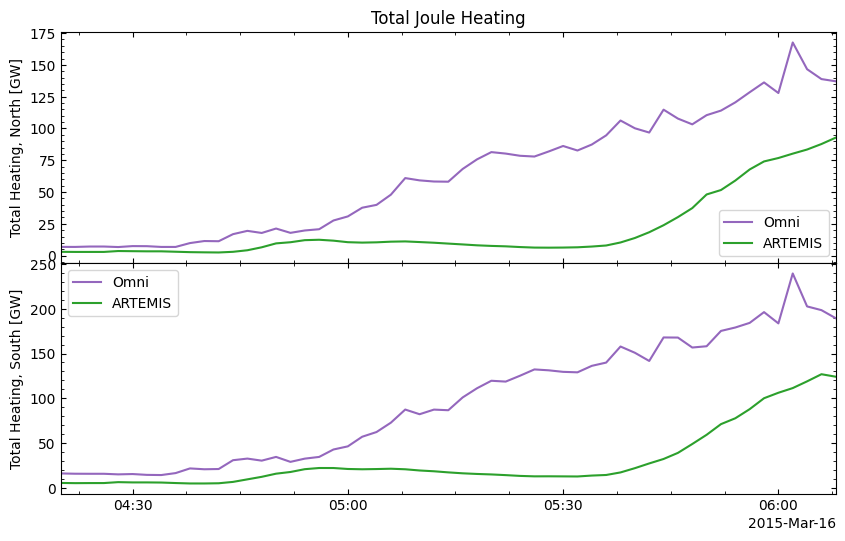

In [64]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(10,6), sharex=True)
plt.subplots_adjust(hspace=0)
ax0.plot(file1['Time'], file1['JH_N'], label='Omni', color='C4')
ax0.plot(file2['Time'], file2['JH_N'], label='ARTEMIS', color='C2')
ax0.legend(loc='lower right')
ax0.set_ylabel('Total Heating, North [GW]')
ax0.set_xlim((file1['Time'][0], file1['Time'][len(file1['Time'])-1]))
ax0.xaxis.set_minor_locator(AutoMinorLocator())
ax0.yaxis.set_minor_locator(AutoMinorLocator())
ax0.tick_params(which='both', axis='both', direction='in', top=True, right=True)


ax1.plot(file1['Time'], file1['JH_S'], label='Omni', color='C4')
ax1.plot(file2['Time'], file2['JH_S'], label='ARTEMIS', color='C2')
ax1.legend(loc='upper left')
ax1.set_ylabel('Total Heating, South [GW]')
#ax1.set_xlabel()
ax1.set_xlim((file1['Time'][0], file1['Time'][len(file1['Time'])-1]))
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both', axis='both', direction='in', top=True, right=True)


ax1.xaxis.set_major_locator(mdates.AutoDateLocator(maxticks=8))
ax1.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax0.xaxis.get_major_locator()))
ax0.set_title('Total Joule Heating')
plt.savefig('{}_{}.png'.format(t,m), dpi=300)